# Итоговая работа по курсу «Python и математика для анализа данных»

Задание:

1.Загрузить файл hr.csv.
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import statistics
from scipy import stats

# 1.Загрузить файл hr.csv. 

In [4]:
data=pd.read_csv('hr.csv')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
data.describe(include = 'all').transpose()
# ниже указаны среднее, min/max, сред. отклонение

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1
last_evaluation,14999,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1
number_project,14999,NaN,NaN,NaN,3.80305,1.23259,2,3,4,5,7
average_montly_hours,14999,NaN,NaN,NaN,201.05,49.9431,96,156,200,245,310
time_spend_company,14999,NaN,NaN,NaN,3.49823,1.46014,2,3,3,4,10
Work_accident,14999,NaN,NaN,NaN,0.14461,0.351719,0,0,0,0,1
left,14999,NaN,NaN,NaN,0.238083,0.425924,0,0,0,0,1
promotion_last_5years,14999,NaN,NaN,NaN,0.0212681,0.144281,0,0,0,0,1
sales,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.median(axis = 0)
# ниже указана медиана

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [8]:
data.mode(axis=0, numeric_only=True)
# ниже указана мода. Во втором ряду указаны NaN, поскольку присутствует только одна мода. 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [9]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')
# расчет и визуализация корреляционной матрицы

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.06,-0.39,0.03
last_evaluation,0.11,1,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1,0.42,0.2,-0,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.07,-0
time_spend_company,-0.1,0.13,0.2,0.13,1,0,0.14,0.07
Work_accident,0.06,-0.01,-0,-0.01,0,1,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0,0.07,0.04,-0.06,1


Вывод. 
- наблюдается статистически значительная отрицательная корреляция между количеством ушедших и уровнем 
удовлетворенности работой
- также, наблюдается статистически значительная отрицательная корреляция между количеством несчастных случаев
и количеством ушедших
- дополнительно, наблюдается статистически значительная положительная корреляция между количеством времени,
проведенным работником в компании, и количеством ушедших из компании.

# 4.Визуализировать несколько взаимосвязей между переменными. 

In [10]:
satisfaction = data['satisfaction_level']
hours = data['average_montly_hours']
evaluation = data['last_evaluation']

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data[['satisfaction_level', 'average_montly_hours', 'last_evaluation']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1        2
0 -0.362637 -0.429907 -0.46875
1  0.560440  0.551402  0.56250
2 -0.956044  0.644860  0.62500
3  0.384615  0.186916  0.59375
4 -0.384615 -0.411215 -0.50000


In [12]:
satisfaction = df_norm[0].apply(np.log10)
hours = df_norm[1].apply(np.log10)
evaluation = df_norm[2].apply(np.log10)

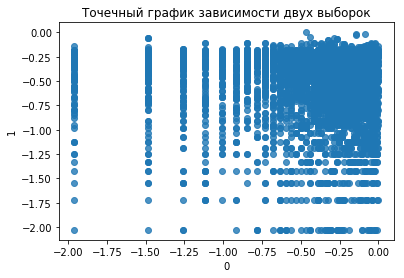

In [13]:
plt.xlabel('satisfaction')
plt.ylabel('hours')
sns.regplot(x= satisfaction, y=hours,data=data, fit_reg=True)
plt.title('Точечный график зависимости двух выборок')
plt.show()

/Users/svetlana/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/svetlana/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


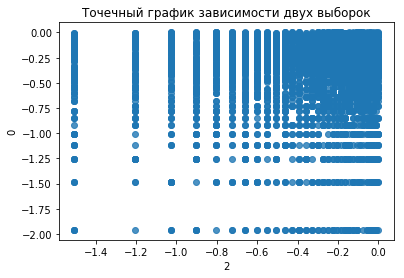

In [14]:
plt.xlabel('evaluation')
plt.ylabel('satisfaction')
sns.regplot(x= evaluation, y=satisfaction,data=data, fit_reg=True)
plt.title('Точечный график зависимости двух выборок')
plt.show()

Визуализация связей между всеми переменными

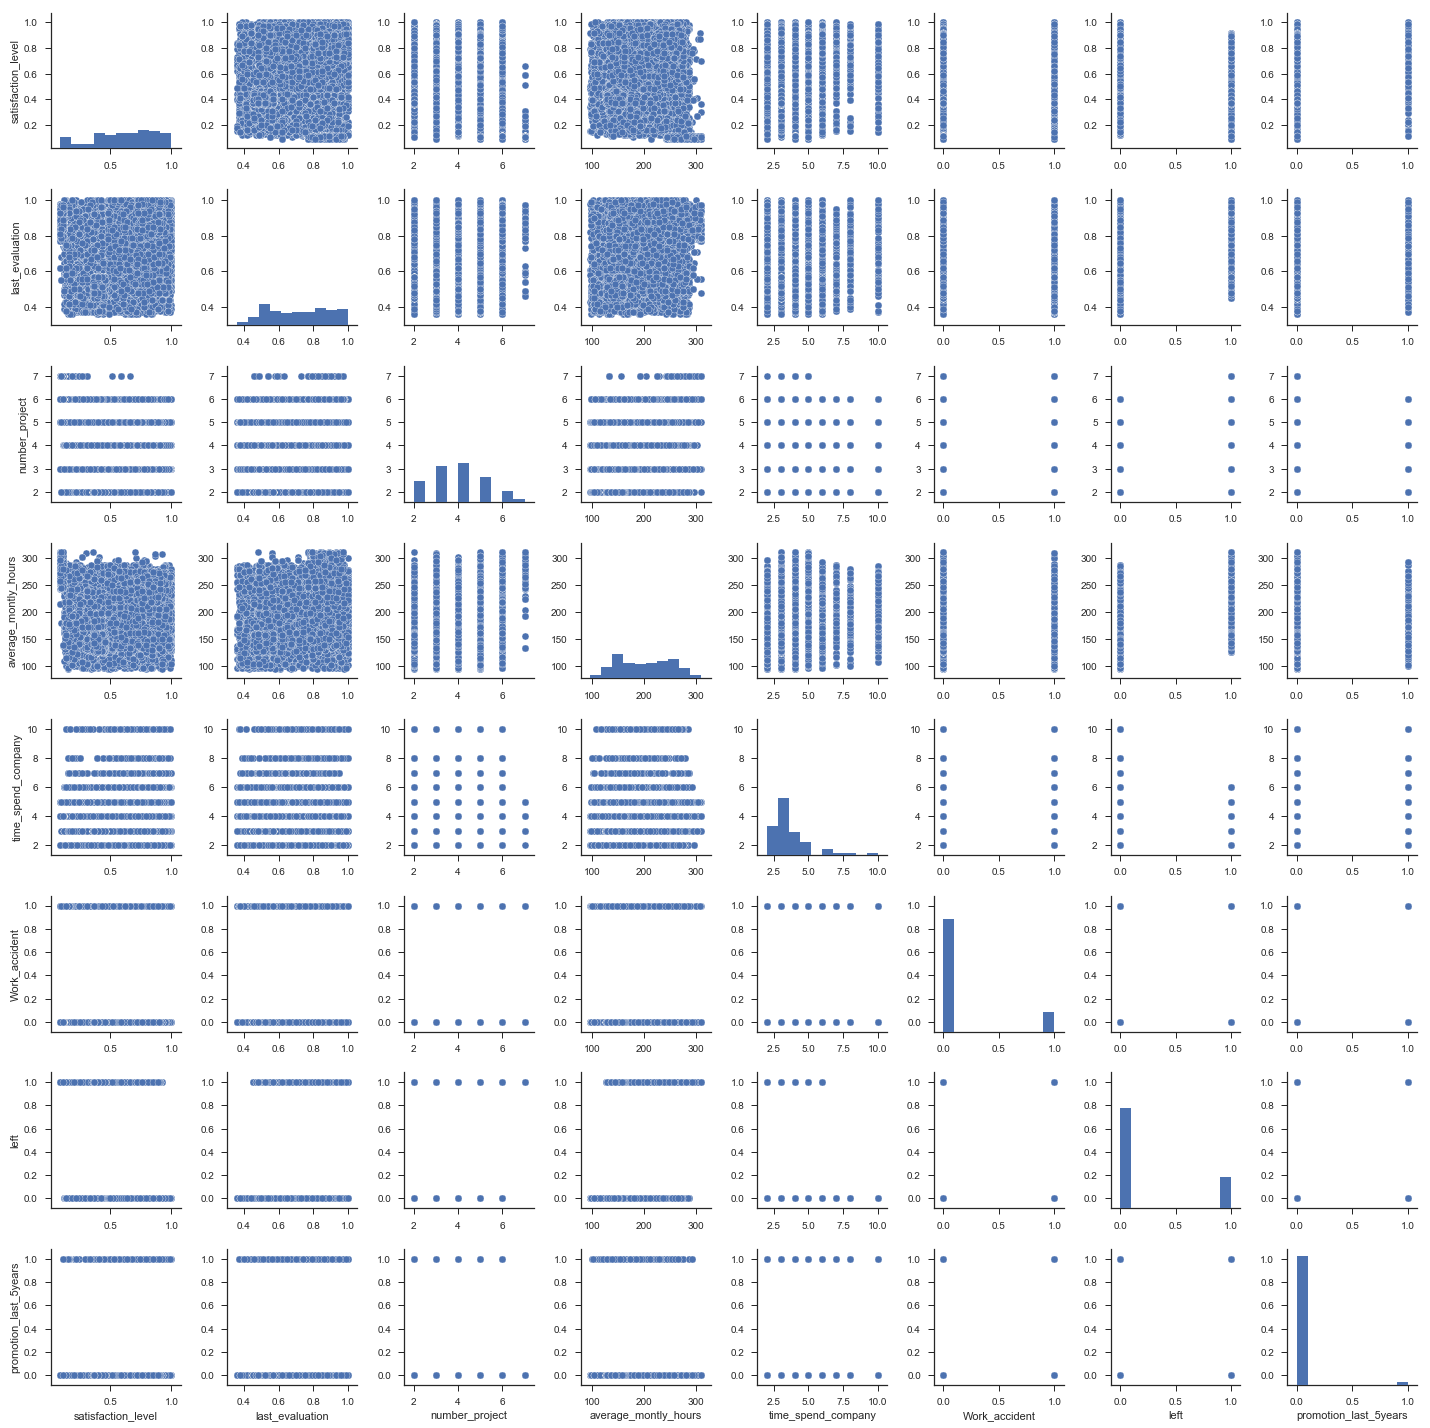

In [15]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Сравним уровень удовлетворенности работой у людей с большим количеством проектов и с малым количеством проектов 

In [37]:
mean_ = data['number_project'].mean()
low_number_projects = np.log10(data[data['number_project']<=mean_]['satisfaction_level'])
high_number_projects = np.log10(data[data['number_project']>mean_]['satisfaction_level'])

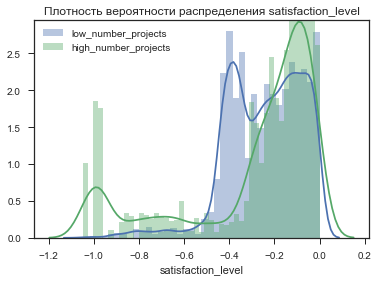

In [38]:
sns.distplot(low_number_projects)
sns.distplot(high_number_projects)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['low_number_projects', 'high_number_projects'])
plt.show()

Поскольку распределения далеки от нормального, воспользуемся непараметрическим тестом Манна-Уитни 
для сравнения двух независимых выборок.

In [39]:
u, p_value = stats.mannwhitneyu(low_number_projects, high_number_projects)
print(p_value)

1.2822056733619174e-16


Вывод: поскольку p-value не превышает 0.05, мы можем отвергнуть нулевую гипотезу о равенстве средних рангов этих двух выборок.

Теперь проверим, существует ли разница между выборкой с меньшим поличеством проектов и генеральной совокупностью.

In [43]:
stats.ttest_1samp(low_number_projects, np.log10(data['satisfaction_level'].mean()))

Ttest_1sampResult(statistic=-14.826217423431407, pvalue=6.308742176075218e-49)

Вывод: мы можем отвергнуть нулевую гипотезу об отсутствии статистических различий между удовлетворенностью от работы 
в выборке с меньшим количеством проектов и генеральной совокупностью. 

Теперь проанализируем удовлетворенность от работы в трех группах: с низким уровнем зарплаты, средним и высоким.

In [44]:
salary_0 = data[data['salary']=='low']['satisfaction_level']
salary_1 = data[data['salary']=='medium']['satisfaction_level']
salary_2 = data[data['salary']=='high']['satisfaction_level']
stats.f_oneway(salary_0, salary_1, salary_2)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

Поскольку p-value ниже 0.05, мы можем отвергнуть нулевую гипотезу от отсутствии разницы между группами.

Визуализируем эти группы:

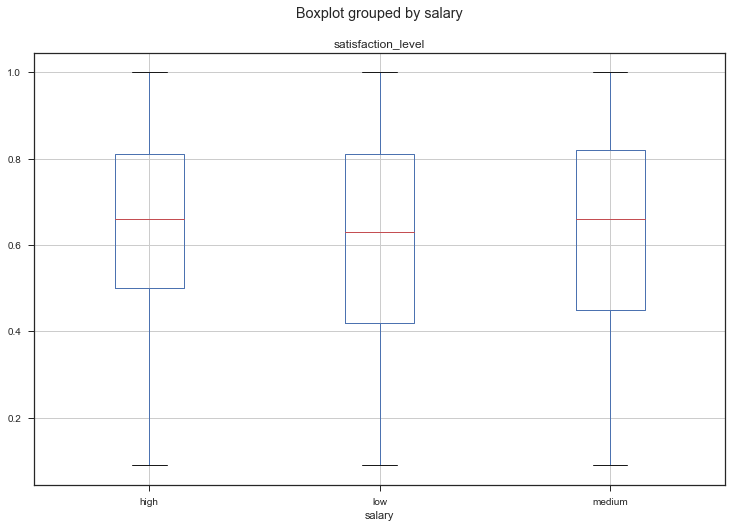

In [47]:
data.boxplot('satisfaction_level', by='salary', figsize=(12, 8))

# 6.Рассчитать, сколько работников работает в каждом департаменте. 

In [52]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

(array([1237.,    0.,    0.,    0.,    0., 7316.,    0.,    0.,    0.,
        6446.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

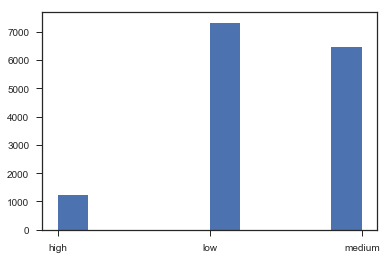

In [53]:
plt.hist(data.salary)

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами. 

In [ ]:
data_new = data.groupby(['sales', 'salary'])['sales'].count().unstack('salary')

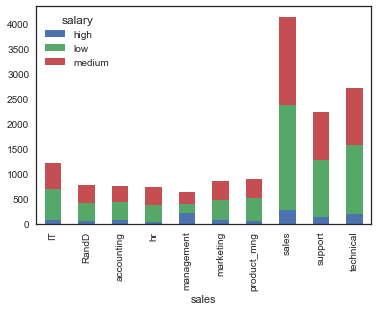

In [250]:
data_new[['high', 'low', 'medium']].plot(kind='bar', stacked=True)

# 9.Сколько сотрудников покинуло компанию. 

In [333]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Вывод: 
3571 сотрудник покинул компанию

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. 

Гипотеза 1. Уровень удовлетворенности работой у ушедших был гораздо ниже, чем у оставшихся.

In [334]:
left_satisf = data[data['left']==1]['satisfaction_level']
stats.ttest_1samp(left_satisf, data['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

Вывод.
Мы можем исключить нулевую гипотезу о том, что уровень неудовлетворенности работой не влияет на намерение остаться в компании в силу статистической значимости (p<0.05) различия между уровнем удовлетворенности работой у группы ушедших из компании и группы оставшихся.

Гипотеза 2. Работники, покинувшие компанию, имели более длительный стаж работы.

In [336]:
left_time = data[data['left']==1]['time_spend_company']
stayed_time = data[data['left']==0]['time_spend_company']

stats.ttest_ind(left_time, stayed_time)

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

Вывод. Мы можем исключить нулевую гипотезу о том, что нет разницы между стажем работы сотрудников, покинувших компанию, и стажем работы оставшихся, в силу статистической значимости (p<0.05) различия между стажем ушедших из компании и стажем оставшихся сотрудников.

In [254]:
u, p_value = stats.mannwhitneyu(left_time, stayed_time)
print("two-sample mannwhitney", p_value)

two-sample mannwhitney 4.330385960458912e-238


В силу того, что переменные выше не характеризуются нормальным распределением, я также применяю непараметрический тест для сравнения двух независимых выборок. Вывод подтверждается.